General Concepts: The PHOEBE Bundle
======================

**HOW TO RUN THIS FILE**: if you're running this in a Jupyter notebook or Google Colab session, you can click on a cell and then shift+Enter to run the cell and automatically select the next cell.  Alt+Enter will run a cell and create a new cell below it.  Ctrl+Enter will run a cell but keep it selected.  To restart from scratch, restart the kernel/runtime.


All of these tutorials assume basic comfort with Python in general - particularly with the concepts of lists, dictionaries, and objects as well as basic comfort with using the numpy and matplotlib packages. This tutorial introduces all the general concepts of accessing parameters within the Bundle.

Setup
----------------------------------------------


Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [4]:
!pip install numpy

  Using cached numpy-1.24.3-cp310-cp310-macosx_11_0_arm64.whl (13.9 MB)


In [5]:

!pip install -I "phoebe>=2.4,<2.5"

  Using cached phoebe-2.4.10.tar.gz (77.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.24.3-cp310-cp310-macosx_11_0_arm64.whl (13.9 MB)
  Using cached scipy-1.10.1-cp310-cp310-macosx_12_0_arm64.whl (28.8 MB)
  Using cached astropy-5.2.2-cp310-cp310-macosx_11_0_arm64.whl (6.8 MB)
  Using cached corner-2.2.2-py3-none-any.whl (15 kB)
  Using cached pytest-7.3.1-py3-none-any.whl (320 kB)
  Using cached requests-2.29.0-py3-none-any.whl (62 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached python_socketio-5.8.0-py3-none-any.whl (56 kB)
  Using cached Flask-2.3.1-py3-none-any.whl (96 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached Flask_SocketIO-4.3.2-py2.py3-none-any.whl (15 kB)
  Using cached gevent_websocket-0.10.1-py3-none-any.whl (22 kB)
  Using cached python_socketio-4.6.1-py2.py3-none-any.whl (51 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached pyerfa-2.0.0.3-cp310-cp310-macosx_11_0_ar

Let's get started with some basic imports:

In [2]:
import phoebe
from phoebe import u # units

If running in IPython notebooks, you may see a "ShimWarning" depending on the version of Jupyter you are using - this is safe to ignore.

PHOEBE 2 uses constants defined in the IAU 2015 Resolution which conflict with the constants defined in astropy.  As a result, you'll see the warnings as phoebe.u and phoebe.c "hijacks" the values in astropy.units and astropy.constants.

Whenever providing units, please make sure to use `phoebe.u` instead of `astropy.units`, otherwise the conversions may be inconsistent.

### Logger

Before starting any script, it is a good habit to initialize a logger and define which levels of information you want printed to the command line (clevel) and dumped to a file (flevel).  A convenience function is provided at the top-level via [phoebe.logger](../api/phoebe.logger.md) to initialize the logger with any desired level.

The levels from most to least information are:

* DEBUG
* INFO
* WARNING
* ERROR
* CRITICAL


In [3]:
logger = phoebe.logger(clevel='WARNING')

All of these arguments are optional and will default to clevel='WARNING' if not provided.  There is therefore no need to provide a filename if you don't provide a value for flevel.

So with this logger, anything with INFO, WARNING, ERROR, or CRITICAL levels will be printed to the screen.  All messages of any level will be written to a file named 'tutorial.log' in the current directory.

Note: the logger messages are not included in the outputs shown below.


## Overview

As a quick overview of what's to come, here is a quick preview of some of the steps used when modeling a binary system with PHOEBE.  Each of these steps will be explained in more detail throughout these tutorials.

First we need to create our binary system.  For the sake of most of these tutorials, we'll use the default detached binary available through the [phoebe.default_binary](../api/phoebe.default_binary.md) constructor.

In [4]:
b = phoebe.default_binary()
print(b)

PHOEBE Bundle: 141 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary)
         requiv@primary@component: 1.0 solRad
C    requiv_max@primary@component: 2.0132751765376384 solRad
           teff@primary@component: 6000.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.437551877570185
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 90.0 deg
C       long_an@primary@component: 0.0 deg
      gravb_b

This object holds all the parameters and their respective values.  We'll see in this tutorial and the next tutorial on [constraints](constraints.ipynb) how to search through these parameters and set their values.

In [5]:
b.set_value(qualifier='teff', component='primary', value=6500)

Next, we need to define our datasets via [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md).  This will be the topic of the following tutorial on [datasets](datasets.ipynb).  Datasets store observations to compare against the model, but also tell PHOEBE at what times to compute the forward model and store passband-dependent options.

In [6]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,1,101))

<ParameterSet: 80 parameters | contexts: dataset, constraint, figure, compute>

We'll then want to run our forward model to create a synthetic model of the observables defined by these datasets using [b.run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md), which will be the topic of the [computing observables](compute.ipynb) tutorial.  The compute options tell PHOEBE how to create a synthetic model from the system parameters for the added datasets.

In [7]:
b.run_compute()

100%|██████████████████████████████████████████████████████| 101/101 [00:00<00:00, 135.60it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [8]:
print(phoebe.linspace(0,1,101))

<linspace start=0.0 stop=1.0 num=101 endpoint=True unit=None>


We can access the value of any parameter, including the arrays in the synthetic model just generated.  To export arrays to a file, we could call [b.export_arrays](../api/phoebe.parameters.ParameterSet.export_arrays.md)

In [9]:
print(b.get_value(qualifier='fluxes', context='model'))

[0.69273328 0.86432306 1.07744179 1.28831888 1.47384436 1.61439936
 1.68785017 1.69162448 1.69231875 1.69390462 1.69520725 1.69666012
 1.69807696 1.69957494 1.70096241 1.702511   1.70374624 1.7051907
 1.70646621 1.70765796 1.70865538 1.70947673 1.71015135 1.71079321
 1.71138634 1.71107379 1.71151595 1.71135701 1.71106855 1.71059461
 1.70999686 1.70915558 1.70849103 1.70729121 1.70638862 1.70546752
 1.70417081 1.70280905 1.70182237 1.70059583 1.69947278 1.69837645
 1.69718504 1.69633455 1.69383379 1.64169057 1.54089117 1.4071697
 1.25561609 1.10356387 0.98348227 1.10357615 1.2556626  1.40734769
 1.54097794 1.64179519 1.69377224 1.69655469 1.69704166 1.69836456
 1.69941101 1.7005961  1.70174117 1.70295238 1.7040497  1.7052959
 1.70624123 1.70739475 1.70837326 1.70928733 1.71000201 1.71055693
 1.7109371  1.71131927 1.71165539 1.71107361 1.71125234 1.71084306
 1.71028919 1.70954513 1.70867058 1.70756171 1.70659796 1.70512607
 1.70391615 1.70271189 1.70111826 1.69946757 1.6981858  1.6966818

We can then plot the resulting model with [b.plot](../api/phoebe.parameters.ParameterSet.plot.md), which will be covered in the [plotting](plotting.ipynb) tutorial.

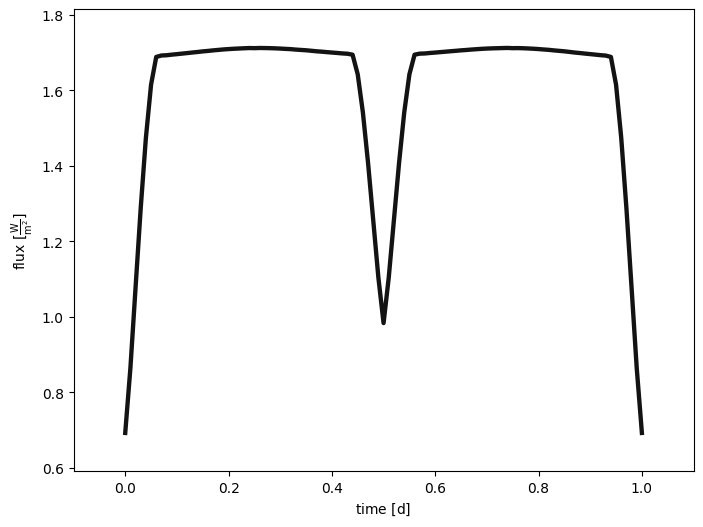

In [10]:
afig, mplfig = b.plot(show=True)

And then lastly, if we wanted to solve the inverse problem and "fit" parameters to observational data, we may want to add [distributions](distributions.ipynb) to our system so that we can run [estimators, optimizers, or samplers](solver.ipynb).

## Default Binary Bundle

For this tutorial, let's start over and discuss this `b` object in more detail and how to access and change the values of the input parameters.

Everything for our system will be stored in this single Python object that we call the [Bundle](../api/phoebe.frontend.bundle.Bundle.md) which we'll call `b` (short for bundle).

In [11]:
b = phoebe.default_binary()

The Bundle is just a collection of [Parameter](../api/phoebe.parameters.Parameter.md) objects along with some callable methods.  Here we can see that the default binary Bundle consists of over 100 individual parameters.

In [12]:
b

<PHOEBE Bundle: 141 parameters | contexts: constraint, compute, system, component, setting, figure>

If we want to view or edit a Parameter in the Bundle, we first need to know how to access it.  Each Parameter object has a number of tags which can be used to [filter](../api/phoebe.parameters.ParameterSet.filter.md) (similar to a database query).  When filtering the Bundle, a [ParameterSet](../api/phoebe.parameters.ParameterSet.md) is returned - this is essentially just a subset of the Parameters in the Bundle and can be further filtered until eventually accessing a single Parameter.

In [13]:
b.filter(context='compute')

<ParameterSet: 17 parameters | components: secondary, primary>

Here we filtered on the context tag for all Parameters with `context='compute'` (i.e. the options for computing a model).  If we want to see all the available options for this tag in the Bundle, we can use the plural form of the tag as a property on the Bundle or any ParameterSet.

In [14]:
b.contexts

['system', 'component', 'constraint', 'compute', 'figure', 'setting']

Although there is no strict hierarchy or order to the tags, it can be helpful to think of the context tag as the top-level tag and is often very helpful to filter by the appropriate context first.

Other tags currently include:
* kind
* figure
* component
* feature
* dataset
* distribution
* compute
* model
* solver
* solution
* time
* qualifier

Accessing the plural form of the tag as an attribute also works on a filtered ParameterSet

In [15]:
b.filter(context='compute').components

['primary', 'secondary']

This then tells us what can be used to filter further.

In [16]:
b.filter(context='compute').filter(component='primary')

<ParameterSet: 4 parameters | qualifiers: ntriangles, mesh_method, distortion_method, atm>

The qualifier tag is the shorthand name of the Parameter itself.  If you don't know what you're looking for, it is often useful to list all the qualifiers of the Bundle or a given ParameterSet.

In [21]:
b.filter(context='compute', component='primary').qualifiers

['mesh_method', 'ntriangles', 'distortion_method', 'atm']

Now that we know the options for the qualifier within this filter, we can choose to filter on one of those.  Let's look filter by the 'ntriangles' qualifier.

In [22]:
b.filter(context='compute', component='primary', qualifier='ntriangles')

<ParameterSet: 1 parameters>

Once we filter far enough to get to a single Parameter, we can use [get_parameter](../api/phoebe.parameters.ParameterSet.get_parameter.md) to return the Parameter object itself (instead of a ParameterSet).

In [23]:
b.filter(context='compute', component='primary', qualifier='ntriangles').get_parameter()

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

As a shortcut, get_parameter also takes filtering keywords.  So the above line is also equivalent to the following:

In [24]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles')

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

Each Parameter object contains several keys that provide information about that Parameter.  The keys "description" and "value" are always included, with additional keys available depending on the type of Parameter.

In [29]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles').get_value()

1500

In [30]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles').get_description()

"Requested number of triangles (won't be exact)."

We can also see a top-level view of the filtered parameters and descriptions (note: the syntax with @ symbols will be explained further in the section on twigs below.

In [31]:
print(b.filter(context='compute', component='primary').info)

ParameterSetInfo: (qualfier/twig: description)
                             atm: Atmosphere table
               distortion_method: Method to use for distorting stars
                     mesh_method: Which method to use for discretizing the surface
                      ntriangles: Requested number of triangles (won't be exact).


Since the Parameter for `ntriangles` is a FloatParameter, it also includes a key for the allowable limits.

In [32]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles').get_limits()

[100, None]

In this case, we're looking at the Parameter called `ntriangles` with the component tag set to 'primary'.  This Parameter therefore defines how many triangles should be created when creating the mesh for the star named 'primary'.  By default, this is set to 1500 triangles, with allowable values above 100.

If we wanted a finer mesh, we could change the value.

In [33]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles').set_value(2000)

In [34]:
b.get_parameter(context='compute', component='primary', qualifier='ntriangles')

<Parameter: ntriangles=2000 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

If we choose the `distortion_method` qualifier from that same ParameterSet, we'll see that it has a few different keys in addition to description and value.

In [35]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method')

<Parameter: distortion_method=roche | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>

In [36]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method').get_value()

'roche'

In [37]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method').get_description()

'Method to use for distorting stars'

Since the distortion_method Parameter is a [ChoiceParameter](../api/phoebe.parameters.ChoiceParameter.md), it contains a key for the allowable choices.

In [38]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method').get_choices()

['roche', 'rotstar', 'sphere', 'none']

We can only set a value if it is contained within this list - if you attempt to set a non-valid value, an error will be raised.

In [40]:
try:
    b.get_parameter(context='compute', component='primary', qualifier='distortion_method').set_value('blah')
except Exception as e:
    print(e)

value for distortion_method@primary@phoebe01@compute must be one of ['roche', 'rotstar', 'sphere', 'none'], not 'blah'


In [41]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method').set_value('rotstar')

In [32]:
b.get_parameter(context='compute', component='primary', qualifier='distortion_method').get_value()

'rotstar'

[Parameter](../api/phoebe.parameters.Parameter.md) types include:
* [IntParameter](../api/phoebe.parameters.IntParameter.md)
* [FloatParameter](../api/phoebe.parameters.FloatParameter.md)
* [FloatArrayParameter](../api/phoebe.parameters.FloatArrayParameter.md)
* [BoolParameter](../api/phoebe.parameters.BoolParameter.md)
* [StringParameter](../api/phoebe.parameters.StringParameter.md)
* [ChoiceParameter](../api/phoebe.parameters.ChoiceParameter.md)
* [SelectParameter](../api/phoebe.parameters.SelectParameter.md)
* [DictParameter](../api/phoebe.parameters.DictParameter.md)
* [ConstraintParameter](../api/phoebe.parameters.ConstraintParameter.md)
* [DistributionParameter](../api/phoebe.parameters.DistributionParameter.md)
* [HierarchyParameter](../api/phoebe.parameters.HierarchyParameter.md)
* [UnitParameter](../api/phoebe.parameters.UnitParameter.md)
* [JobParameter](../api/phoebe.parameters.JobParameter.md)

these Parameter types and their available options are all described in great detail in [Advanced: Parameter Types](parameters.ipynb)

### Twigs

As a shortcut to needing to filter by all these tags, the Bundle and ParameterSets can be filtered through what we call "twigs" (as in a Bundle of twigs).  These are essentially a single string-representation of the tags, separated by `@` symbols.

This is very useful as a shorthand when working in an interactive Python console, but somewhat obfuscates the names of the tags and can make it difficult if you use them in a script and make changes earlier in the script.

For example, the following lines give identical results:

In [33]:
b.filter(context='compute', component='primary')

<ParameterSet: 4 parameters | qualifiers: mesh_method, ntriangles, distortion_method, atm>

In [34]:
b['primary@compute']

<ParameterSet: 4 parameters | qualifiers: mesh_method, ntriangles, distortion_method, atm>

In [35]:
b['compute@primary']

<ParameterSet: 4 parameters | qualifiers: mesh_method, ntriangles, distortion_method, atm>

However, this dictionary-style twig access will never return a ParameterSet with a single Parameter, instead it will return the Parameter itself.  This can be seen in the different output between the following two lines:

In [36]:
b.filter(context='compute', component='primary', qualifier='distortion_method')

<ParameterSet: 1 parameters>

In [37]:
b['distortion_method@primary@compute']

<Parameter: distortion_method=rotstar | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>

Because of this, this dictionary-style twig access can also set the value directly:

In [38]:
b['distortion_method@primary@compute'] = 'roche'

In [39]:
print(b['distortion_method@primary@compute'])

Parameter: distortion_method@primary@phoebe01@compute
                       Qualifier: distortion_method
                     Description: Method to use for distorting stars
                           Value: roche
                         Choices: roche, rotstar, sphere, none
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching,hierarchy.is_meshable:true



And can even provide direct access to the keys/attributes of the Parameter (value, description, limits, etc)

In [40]:
print(b['value@distortion_method@primary@compute'])

roche


In [41]:
print(b['description@distortion_method@primary@compute'])

Method to use for distorting stars


As with the tags, you can call .twigs on any ParameterSet to see the "smallest unique twigs" of the contained Parameters

In [42]:
b['compute'].twigs

['sample_from@phoebe01@phoebe@compute',
 'comments@phoebe01@phoebe@compute',
 'dynamics_method@phoebe01@phoebe@compute',
 'ltte@phoebe01@phoebe@compute',
 'irrad_method@phoebe01@phoebe@compute',
 'boosting_method@phoebe01@phoebe@compute',
 'eclipse_method@phoebe01@phoebe@compute',
 'horizon_method@phoebe01@phoebe@compute',
 'mesh_method@primary@phoebe01@phoebe@compute',
 'mesh_method@secondary@phoebe01@phoebe@compute',
 'ntriangles@primary@phoebe01@phoebe@compute',
 'ntriangles@secondary@phoebe01@phoebe@compute',
 'distortion_method@primary@phoebe01@phoebe@compute',
 'distortion_method@secondary@phoebe01@phoebe@compute',
 'atm@primary@phoebe01@phoebe@compute',
 'atm@secondary@phoebe01@phoebe@compute']

Since the more verbose method without twigs is a bit clearer to read, most of the tutorials will show that syntax, but feel free to use twigs if they make more sense to you.

Next
----------

Next up: let's learn about [constraints](constraints.ipynb).

Or look at any of the following advanced topics:
* [Advanced: Parameter Types](parameters.ipynb)
* [Advanced: Parameter Units](units.ipynb)
* [Advanced: Building a System](building_a_system.ipynb)
* [Advanced: Contact Binary Hierarchy](contact_binary_hierarchy.ipynb)
* [Advanced: Saving, Loading, and Exporting](saving_and_loading.ipynb)